In [6]:
# basics
from IPython import get_ipython
get_ipython().magic('reset -sf')
import pandas as pd
#import cv2
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
from glob import glob
import os
plt.style.use('ggplot')
from bayes_opt import BayesianOptimization
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# preprocess
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import PowerTransformer

# Classifier Libraries
import collections
from lightgbm import LGBMClassifier

# preprocess
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn import under_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import collections
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import catboost as cgb
from functools import partial

#keras
import tensorflow.keras.initializers
import tensorflow.keras
from tensorflow import keras
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import statistics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, InputLayer
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# resample
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling

# imbalanced
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.metrics import classification_report_imbalanced

# evalue
from numpy import mean
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import average_precision_score 
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import SCORERS
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

# warning
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
data = pd.read_csv('creditcard.csv')
print("Full dataset has",data.shape[0], "rows and", data.shape[1], "columns")

Full dataset has 284807 rows and 31 columns


In [3]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [4]:
def relu(x):
    return np.maximum(x, 0., None)

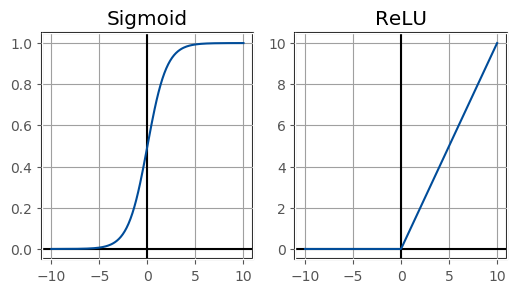

In [5]:
fig,axes = plt.subplots(1,2,figsize=(6,3),dpi=100)
x = np.linspace(-10,10,200)

for ax in axes.flat:
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    #ax.grid(True)
#axes[0].set_xlim([-10, 10])
axes[0].plot(x, sigmoid(x), color ='#004c99')
axes[0].patch.set_facecolor('white')
axes[0].set_title('Sigmoid')
axes[0].grid(True, color = '#A0A0A0')
axes[0].patch.set_edgecolor('black')  

axes[0].patch.set_linewidth('1.5') 
axes[1].plot(x, relu(x), color ='#004c99')
axes[1].patch.set_facecolor('white')
axes[1].grid(True, color = '#A0A0A0')
#axes[1].set_xlim([-10, 10])
axes[1].set_title('ReLU', color ='black')
axes[1].patch.set_edgecolor('#000000')  

axes[1].patch.set_linewidth('1.5')
#plt.savefig('sig-vs-relu.png')
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
# Start exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [8]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94705.035216     -0.001143     -0.018290      0.000795      0.000350   
std     47584.727034      1.994661      1.709050      1.522313      1.420003   
min         0.000000    -40.470142    -63.344698    -31.813586     -5.266509   
25%     53924.000000     -0.908809     -0.610322     -0.892884     -0.847370   
50%     84551.000000      0.031139      0.051775      0.178943     -0.017692   
75%    139392.000000      1.320048      0.792685      1.035197      0.737312   
max    172784.000000      2.411499     17.418649      4.069865     16.715537   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.015666      0.003634     -0.008523     -0.003040      0.014536   
std        1.395552      1.334

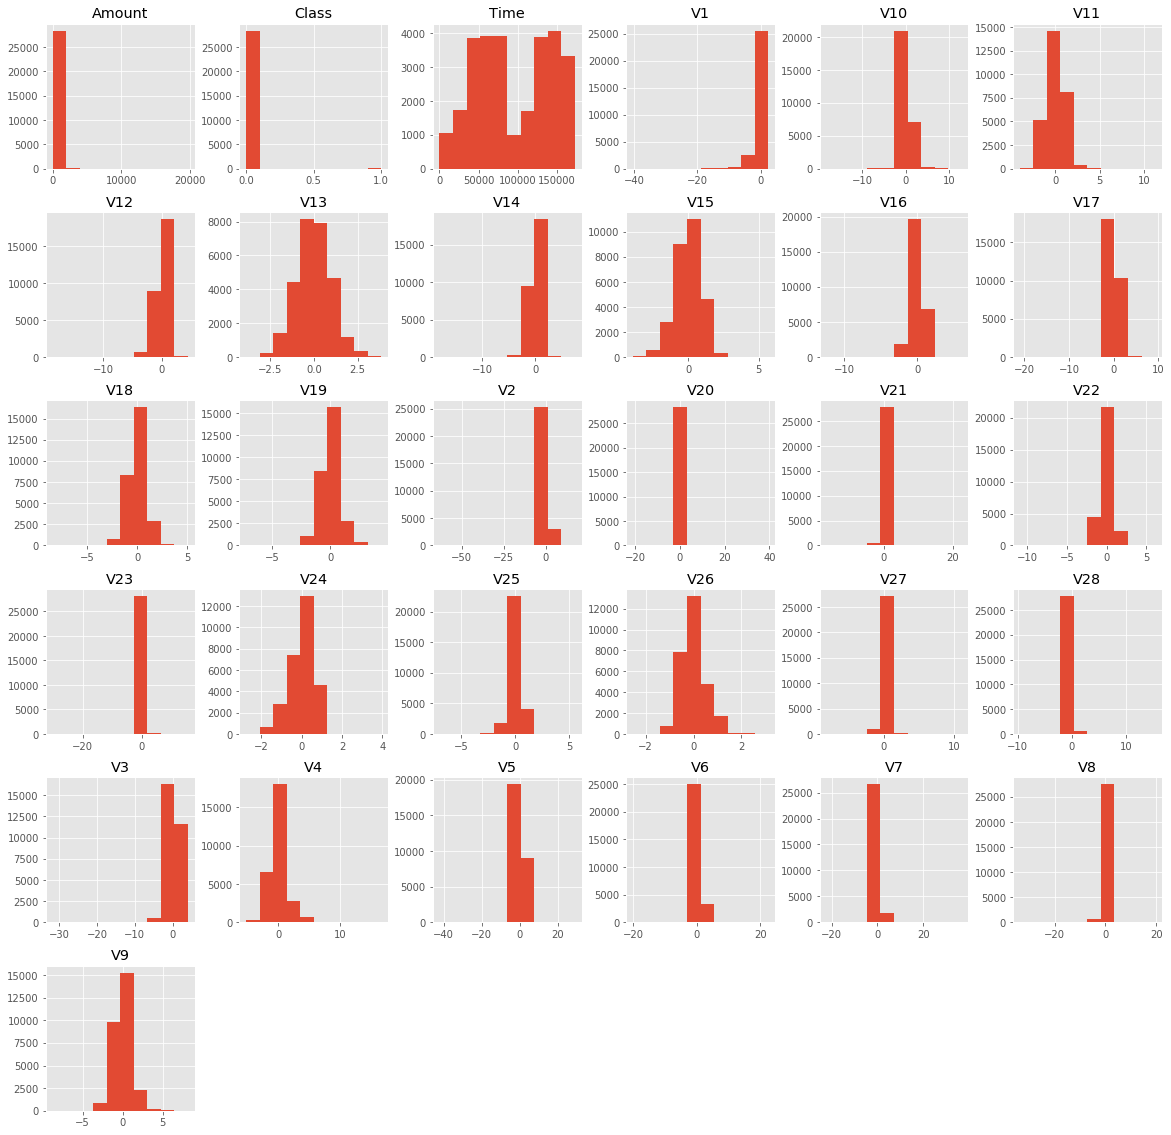

In [9]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

# ***Feature Extraction***

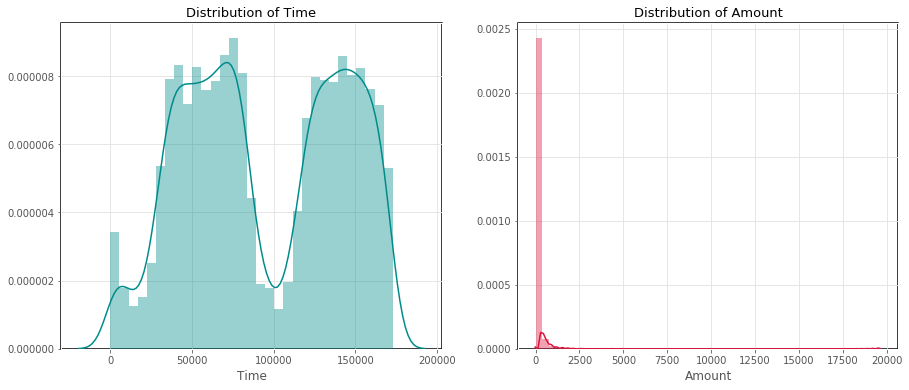

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(data['Time'], ax=ax1, color='#008B8B')
ax2 = sns.distplot(data['Amount'], ax=ax2, color='#DC143C')
ax1.set_title('Distribution of Time', fontsize=13)
ax2.set_title('Distribution of Amount', fontsize=13)
ax1.patch.set_facecolor('white')
ax1.grid(True, color = '#E0E0E0')
ax1.patch.set_edgecolor('black')  
ax1.patch.set_linewidth('1.5') 
ax2.patch.set_facecolor('white')
ax2.grid(True, color = '#E0E0E0')
ax2.patch.set_edgecolor('black')  
ax2.patch.set_linewidth('1.5') 

In [11]:
#data['day']=(data['Time']//86400).astype('int')
data['hour']=((data['Time']//3600)//2.).astype('int')
#data['minute']=((data['Time']%3600.)//60).astype('int')
#data['second']=((data['Time']%3600)%60).astype('int')
data['second']=(data['Time']%3600).astype('int')
data.drop('Time',axis=1,inplace=True)
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,second
169876,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,...,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0,16,1107
127467,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,...,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0,10,2740
137900,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,...,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0,11,3182
21513,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,...,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0,4,2917
134700,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,...,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0,11,1723


# ***Removing duplicate data***

In [12]:
print("Duplicate vs Non duplicate counts :")
print(data.duplicated().value_counts())

Duplicate vs Non duplicate counts :
False    28464
True        17
dtype: int64


In [13]:
# Removing the Duplicate Values
data.drop_duplicates(inplace = True)

In [14]:
# Check for duplicate data if they exist 
print(data.duplicated().value_counts())

# Reset the index
data.reset_index(drop = True , inplace = True)

False    28464
dtype: int64


In [15]:
print(data['Class'].value_counts())
print('\n')
print(data['Class'].value_counts(normalize=True))

0    28415
1       49
Name: Class, dtype: int64


0    0.998279
1    0.001721
Name: Class, dtype: float64


In [16]:
classes=data['Class'].value_counts()
Valid=round(classes[0]/data['Class'].count(), 4)
Fraud=round(classes[1]/data['Class'].count(), 4)

print('Fradulent transactions (Label 1)     : {0} % ({1})'.format(Fraud, classes[1]))
print('Genioun transactions (Label 0) : {0} % ({1})'.format(Valid, classes[0]))

Fradulent transactions (Label 1)     : 0.0017 % (49)
Genioun transactions (Label 0) : 0.9983 % (28415)


[Text(0, 0, '0'), Text(0, 0, '1')]

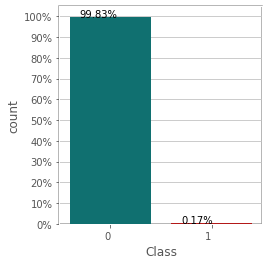

In [17]:
# Create plots for the number and percentage of fraudulent vs Valid transcations
plt.figure(figsize=(8,4))
plt.subplot(121)
#colors = ['#008080','crimson']
#colors = ['crimson','#008080']
colors = ['#008080','#CC0000']
Class = data["Class"]
total = len(Class)*1.
ax=sns.countplot(x="Class", data=data, palette=colors)

for p in ax.patches:
  ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
  ax.patch.set_facecolor('white')
  ax.yaxis.grid(True, color = '#C0C0C0') 
  ax.patch.set_edgecolor('#A0A0A0')  
  ax.patch.set_linewidth('1.5')
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.0f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), ha="right")




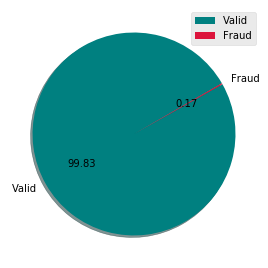

In [18]:
# Create plots for the number and percentage of fraudulent vs Valid transcations
plt.figure(figsize=(10,5))

plt.subplot(122)
#plt.title('Percentage of each Class', fontsize=14)
plt.pie(x=[Valid,Fraud],labels=['Valid','Fraud'],
        autopct='%.2f', colors=['#008080','crimson'], startangle=30, shadow=True)
plt.legend(loc='best')

plt.show()

# X,Y

In [19]:
df = pd.DataFrame(data, columns=['V10' ,'V11' ,'V12' ,'V14' ,'V16' ,'V17', 'Class'])

In [20]:
X = df.drop('Class', axis=1)
y = df['Class']

# ***Feature Selection***

In [21]:
X = data.drop('Class', axis=1)
y = data['Class']

Feature 0 : 0.0015
Feature 1 : 0.0025
Feature 2 : 0.004
Feature 3 : 0.0045
Feature 4 : 0.0016
Feature 5 : 0.0024
Feature 6 : 0.0037
Feature 7 : 0.0012
Feature 8 : 0.0035
Feature 9 : 0.0067
Feature 10 : 0.0066
Feature 11 : 0.0075
Feature 12 : 0.0
Feature 13 : 0.0084
Feature 14 : 0.0
Feature 15 : 0.0056
Feature 16 : 0.0073
Feature 17 : 0.0039
Feature 18 : 0.0008
Feature 19 : 0.0004
Feature 20 : 0.0024
Feature 21 : 0.0
Feature 22 : 0.0004
Feature 23 : 0.0002
Feature 24 : 0.0002
Feature 25 : 0.0
Feature 26 : 0.0015
Feature 27 : 0.0018
Feature 28 : 0.0013
Feature 29 : 0.0004
Feature 30 : 0.0002


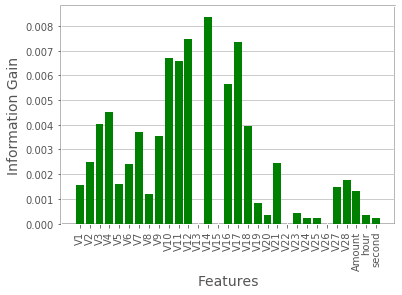

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.20)
rob_scaler = RobustScaler()
X_test = rob_scaler.fit_transform(X_test)
X_test = rob_scaler.fit_transform(X_test)

from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
infogain_classif = SelectKBest(score_func=mutual_info_classif, k=6)
infogain_classif.fit(X_train, y_train)
#colors = ['crimson','#008080']
# what are scores for the features
for i in range(len(infogain_classif.scores_)):
    print(f'Feature {i} : {round(infogain_classif.scores_[i],4)}')

# plot the scores
plt.bar([X_train.columns[i] for i in range(len(infogain_classif.scores_))], infogain_classif.scores_ ,color=['green'])
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,7)
#plt.title('Feature Selection', fontsize=14)
ax = plt.gca()
ax.patch.set_facecolor('white')
ax.yaxis.grid(True, color = '#C0C0C0') 
ax.patch.set_edgecolor('#A0A0A0')  
ax.patch.set_linewidth('1.5')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Information Gain',fontsize=14)
plt.show()

In [23]:
#set of best features set
mask=infogain_classif.get_support()
not_mask=np.logical_not(mask)

all_features=np.array(list(X))

best_features=all_features[mask]
bad_features=all_features[~mask]#not_mask
print('Best Features :',best_features)
print('Bad Features :',bad_features)

Best Features : ['V10' 'V11' 'V12' 'V14' 'V16' 'V17']
Bad Features : ['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V13' 'V15' 'V18' 'V19'
 'V20' 'V21' 'V22' 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'Amount' 'hour'
 'second']


In [24]:
df = pd.DataFrame(data, columns=['V10' ,'V11' ,'V12' ,'V14' ,'V16' ,'V17', 'Class'])

In [25]:
df.to_csv('processed.csv')

In [26]:
X = df.drop('Class', axis=1)
y = df['Class']

# Train and Test 

In [27]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)
#train, test = train_test_split(df, test_size = 0.2, shuffle=True, stratify=df['Class'])
print("Train Shape: {} \nTest Shape: {}".format(train.shape, test.shape))

Train Shape: (22771, 7) 
Test Shape: (5693, 7)


In [28]:
X_train  = train.drop('Class', axis=1).values
y_train  = train['Class'].values
print('before sampling: \nX_train  shape: {} \ny_train shape: {}'.format(X_train.shape, y_train.shape))

before sampling: 
X_train  shape: (22771, 6) 
y_train shape: (22771,)


In [29]:
X_test  = test.drop('Class', axis=1)
y_test  = test['Class']
print('\nX_test  shape: {} \ny_test shape: {}'.format(X_test.shape, y_test.shape))


X_test  shape: (5693, 6) 
y_test shape: (5693,)


In [30]:
X_test  = test
y_test  = test['Class']

In [31]:
X_test_Fraud = X_test[X_test.Class==1]
X_test_Valid = X_test[X_test.Class==0]
y_test_Fraud = y_test[X_test.Class==1]
y_test_Valid = y_test[X_test.Class==0] 

X_test = X_test.drop('Class', axis=1).values
y_test = y_test.values  

X_test_Valid =X_test_Valid.drop('Class', axis=1).values
y_test_Valid = y_test_Valid.values

X_test_Fraud = X_test_Fraud.drop('Class', axis=1).values
y_test_Fraud = y_test_Fraud.values  

In [32]:
print('X_test  shape: {} \ny_test shape: {}'.format(X_test.shape, y_test.shape))
print('X_test_Fraud  shape: {} \ny_test_Fraud shape: {}'.format(X_test_Fraud.shape, y_test_Fraud.shape))
print('X_test_Valid  shape: {} \ny_test_Valid shape: {}'.format(X_test_Valid.shape, y_test_Valid.shape))

X_test  shape: (5693, 6) 
y_test shape: (5693,)
X_test_Fraud  shape: (10, 6) 
y_test_Fraud shape: (10,)
X_test_Valid  shape: (5683, 6) 
y_test_Valid shape: (5683,)


# ***Bayesian Optimization***

##*LGBM*

In [33]:
# create purpose function
def lgbm_cv(learning_rate, max_depth, num_leaves):
    model = LGBMClassifier(learning_rate = learning_rate,
                                num_leaves = int(round(num_leaves)),
                                max_depth = int(round(max_depth)), 
                                class_weight = 'balanced'
                               )
    
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring= 'neg_log_loss')
    return np.mean(scores['test_score'])

# Interval to be explored for input values
params = {'learning_rate': (0.001, 0.2),
           'max_depth': (-1, 8),
           'num_leaves': (2, 250)
          }

from bayes_opt import BayesianOptimization
lgbmBO = BayesianOptimization(lgbm_cv, params)

start = time.time()
lgbmBO.maximize(init_points=5, n_iter = 8, acq='ei')

print('It takes %s minutes' % ((time.time() - start)/60))
params_lgbm = lgbmBO.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round(params_lgbm['num_leaves'])
print(params_lgbm)

|   iter    |  target   | learni... | max_depth | num_le... |
-------------------------------------------------------------
|  1        | -0.006524 |  0.1618   | -0.2999   |  196.2    |
|  2        | -0.007065 |  0.1932   |  0.1964   |  223.0    |
|  3        | -0.005385 |  0.09813  |  3.996    |  241.6    |
|  4        | -0.1185   |  0.05199  |  0.9611   |  130.0    |
|  5        | -0.1833   |  0.01685  |  2.45     |  203.4    |
|  6        | -0.005756 |  0.1162   |  0.2471   |  222.9    |
|  7        | -0.007117 |  0.2      | -1.0      |  193.0    |
|  8        | -0.6092   |  0.001    |  3.648    |  220.7    |
|  9        | -0.0863   |  0.106    |  0.5362   |  194.3    |
|  10       | -0.007117 |  0.2      | -1.0      |  198.2    |
|  11       | -0.06533  |  0.169    |  1.489    |  241.7    |
|  12       | -0.02239  |  0.03359  | -0.9247   |  222.1    |
|  13       | -0.006681 |  0.189    |  5.642    |  239.5    |
It takes 0.13239063819249472 minutes
{'learning_rate': 0.0981342531276

##*XGBoost*

In [34]:
# estimate a value for the scale_pos_weight xgboost hyperparameter
from sklearn.datasets import make_classification
from collections import Counter
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 579.898


In [35]:
##neg log loss
# create purpose function
def xgb_cv(learning_rate, max_depth, n_estimators):
    model = XGBClassifier(learning_rate = learning_rate,
                                max_depth = int(round(max_depth)),
                                n_estimators = int(round(n_estimators)),
                                scale_pos_weight = 592
                          )
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring='neg_log_loss')
    return np.mean(scores['test_score'])

# Interval to be explored for input values
params={'learning_rate': (0.001, 0.2),
           'max_depth': (3, 10),
           'n_estimators': (50, 100)
          }

from bayes_opt import BayesianOptimization
xgbBO = BayesianOptimization(xgb_cv, params)

start = time.time()
xgbBO.maximize(init_points=5, n_iter = 8, acq='ei')

print('It takes %s minutes' % ((time.time() - start)/60))

params_xgb = xgbBO.max['params']
params_xgb['max_depth'] = round(params_xgb['max_depth'])
params_xgb['n_estimators'] = round(params_xgb['n_estimators'])
params_xgb['learning_rate'] = round((params_xgb['learning_rate']),4)
print(params_xgb)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
|  1        | -0.1541   |  0.01469  |  8.804    |  86.93    |
|  2        | -0.008834 |  0.08457  |  9.192    |  56.11    |
|  3        | -0.00472  |  0.1594   |  4.09     |  83.22    |
|  4        | -0.2858   |  0.007904 |  7.418    |  89.55    |
|  5        | -0.0299   |  0.03331  |  6.557    |  88.98    |
|  6        | -0.005483 |  0.1016   |  4.11     |  83.24    |
|  7        | -0.08618  |  0.02158  |  6.033    |  88.48    |
|  8        | -0.007325 |  0.07827  |  3.633    |  83.41    |
|  9        | -0.2851   |  0.009401 |  3.73     |  82.72    |
|  10       | -0.008426 |  0.101    |  3.704    |  60.33    |
|  11       | -0.004796 |  0.189    |  3.944    |  83.49    |
|  12       | -0.06051  |  0.03741  |  3.474    |  83.78    |
|  13       | -0.004766 |  0.2      |  4.368    |  83.39    |
It takes 0.2716016411781311 minutes
{'learning_rate': 0.1594, 'max_dep

##*CatBoost*

In [36]:
from catboost import CatBoostClassifier
import random
import numpy as np
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train, verbose=False)
cbc.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.03913199

In [37]:
# create purpose function
import catboost as cgb
from bayes_opt import BayesianOptimization
def cat_cv(learning_rate, depth, iterations):
    model = CatBoostClassifier(learning_rate = learning_rate,
                                depth = int(round(depth)), 
                                iterations = int(round(iterations)),
                                class_weights = {0:1, 1:592},verbose=False
                                )
    cv = StratifiedKFold(n_splits=5)
    scores = cross_validate(model, X_train, y_train,verbose=False, cv=cv, scoring='neg_log_loss')
    return np.mean(scores['test_score'])

# Interval to be explored for input values
params={'learning_rate': (0.001, 0.2),
        'depth' : (6, 16),
        'iterations': (50, 200)
          }

from bayes_opt import BayesianOptimization
catBO = BayesianOptimization(cat_cv, params)
start = time.time()
catBO.maximize(init_points=4, n_iter = 8, acq='ei')

print('It takes %s minutes' % ((time.time() - start)/60))

params_cat = catBO.max['params']
params_cat['depth'] = round(params_cat['depth'])
params_cat['iterations'] = round(params_cat['iterations'])
print(params_cat)

|   iter    |  target   |   depth   | iterat... | learni... |
-------------------------------------------------------------
|  1        | -0.02033  |  14.75    |  146.4    |  0.0591   |
|  2        | -0.01036  |  14.16    |  127.1    |  0.1437   |
|  3        | -0.007247 |  7.675    |  188.5    |  0.09017  |
|  4        | -0.51     |  7.313    |  59.48    |  0.004843 |
|  5        | -0.05416  |  8.607    |  189.0    |  0.01836  |
|  6        | -0.005509 |  6.0      |  185.1    |  0.2      |
|  7        | -0.005495 |  6.0      |  188.4    |  0.2      |
|  8        | -0.008945 |  14.28    |  134.2    |  0.1795   |
|  9        | -0.5986   |  8.837    |  130.8    |  0.001    |
|  10       | -0.01095  |  16.0     |  130.6    |  0.2      |
|  11       | -0.03944  |  15.97    |  137.1    |  0.04172  |
|  12       | -0.01117  |  16.0     |  124.6    |  0.2      |
It takes 29.69179884195328 minutes
{'depth': 6, 'iterations': 188, 'learning_rate': 0.2}


In [38]:
#model = CatBoostClassifier(class_weights= {0:1, 1:592}, learning_rate=0.2, iterations=187, depth= 16 ,verbose=False)
#cv_results(model, output_type='dict')

In [39]:
model = CatBoostClassifier(class_weights= {0:1, 1:592}, learning_rate=0.2, iterations=187, depth= 16 ,verbose=False )

In [40]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# summary  
print('\n')
print('--------- Summary ------------')
print('\n')
print('accuracy: {}'.format(round(accuracy_score(y_test, y_pred),4)))
print('Precision: {}'.format(round(precision_score(y_test, y_pred),4)))
print('f1: {}'.format(round(f1_score(y_test, y_pred),4)))
print('Recall: {}'.format(round(recall_score(y_test, y_pred),4)))
print('AUC: {}'.format(round(roc_auc_score(y_test, y_pred),4)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_pred),4)))
print('Precision-Recallproba: {}'.format(round(average_precision_score(y_test, y_proba),4)))
print('MCC: {}'.format((matthews_corrcoef(y_test, y_pred))))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5683
           1       0.70      0.70      0.70        10

    accuracy                           1.00      5693
   macro avg       0.85      0.85      0.85      5693
weighted avg       1.00      1.00      1.00      5693

[[5680    3]
 [   3    7]]


--------- Summary ------------


accuracy: 0.9989
Precision: 0.7
f1: 0.7
Recall: 0.7
AUC: 0.8497
Precision-Recall: 0.4905
Precision-Recallproba: 0.4113
MCC: 0.6994721098011614


# ***cv strifiedkfold***

In [41]:
from sklearn.utils import shuffle
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
X = df.drop('Class', axis = 1)
y = df['Class']
def cv_results(model, output_type = 'result'):
  # Create the pipeline

  '''pipeline = make_pipeline(
      SMOTE(sampling_strategy='minority', k_neighbors = 5, n_jobs=-1, random_state = 42),
      model
      )
  pipeline = make_pipeline(
      RandomUnderSampler(sampling_strategy='majority', random_state = 42),
      model
      )'''

    # Cross validation with sklearn
  sk_fold = StratifiedKFold(n_splits=5)

  scoring = {'f1': 'f1',
             'precision': 'precision',
             'recall': 'recall',
             'accuracy': 'accuracy',
             'roc_auc': 'roc_auc'
             }

  #cv_scores = cross_validate(pipeline, X, y, scoring = scoring, cv = sk_fold)
  cv_scores = cross_validate(model, X, y, scoring = scoring, cv = sk_fold)
  
  f1 = cv_scores['test_f1']
  precision = cv_scores['test_precision']
  recall = cv_scores['test_recall']
  accuracy = cv_scores['test_accuracy']
  roc_auc = cv_scores['test_roc_auc']
  # Average the recall and precision and f1 and accuracy scores and roc_auc
  avg_f1 = np.mean(cv_scores['test_f1'])
  avg_precision = np.mean(cv_scores['test_precision'])
  avg_recall = np.mean(cv_scores['test_recall'])
  avg_accuracy = np.mean(cv_scores['test_accuracy'])
  avg_roc_auc = np.mean(cv_scores['test_roc_auc'])
  # Different output options
  if output_type == 'dict':
    output = {'f1': avg_f1,
              'precision': avg_precision,
              'recall': avg_recall,
              'accuracy': avg_accuracy,
              'roc_auc': avg_roc_auc}
    return output
  elif output_type == 'result':
    return cv_scores
  elif output_type == 'print':
    print('Model: {} \nF1 score:{:.4f} \nPrecision: {:.4f} \nRecall: {:.4f} \naccuracy: {:.4f}\nroc_auc: {:.4f}  '.format(
        type(model).__name__, avg_f1, avg_precision, avg_recall,  avg_accuracy, roc_auc
    ))

In [42]:
log_reg = LogisticRegression(class_weight='balanced')
cv_results(log_reg, output_type='dict')

{'f1': 0.06936478330147355,
 'precision': 0.03619595563243308,
 'recall': 0.8577777777777778,
 'accuracy': 0.9595977985317867,
 'roc_auc': 0.9190580092674058}

In [43]:
model_accuracy = []
model_precision = []
model_recall = []
model_f1 = []
model_time = []

##model

In [44]:
log_reg = LogisticRegression(class_weight='balanced')
lightgbm1= lgb.LGBMClassifier()
xgboost1 = XGBClassifier()
catboost1 = CatBoostClassifier(verbose=False)

#CLASS_WEIGHT
lightgbm2= lgb.LGBMClassifier(class_weight='balanced')
xgboost2 = XGBClassifier(scale_pos_weight = 592)
catboost2 = CatBoostClassifier(scale_pos_weight = 592,verbose=False)
catboost3 = CatBoostClassifier(class_weights= {0:1, 1:592}, learning_rate=0.2, iterations=187, depth= 16 ,verbose=False )

#Extension
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=1000, random_state=4000)),('lgbm', LGBMClassifier(learning_rate='0.182', max_depth= '8', num_leaves= '33', class_weight='balanced'))]

clf = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=200))

#HYPER_PARAMETR
lightgbm = lgb.LGBMClassifier(learning_rate='0.182', max_depth= '8', num_leaves= '33', class_weight='balanced')
xgboost = XGBClassifier(scale_pos_weight = 592, learning_rate= 0.1109, max_depth=9, n_estimators= 98)
catboost = CatBoostClassifier(scale_pos_weight = 592,verbose=False)

#ENSEMBLE
Model1 = [('lightgbm', lightgbm), ('xgboost', xgboost), ('catboost', catboost)]
Model2 = [('lightgbm', lightgbm), ('xgboost', xgboost)]
Model3 = [('catboost', catboost), ('xgboost', xgboost)]
Model4 = [('lightgbm', lightgbm), ('catboost', catboost)]

voting1 = VotingClassifier(estimators=Model1,voting='soft')
voting2 = VotingClassifier(estimators=Model2,voting='soft')
voting3 = VotingClassifier(estimators=Model3,voting='soft')
voting4 = VotingClassifier(estimators=Model4,voting='soft')

# ***Result***

In [45]:
models = [lightgbm1, xgboost1 ,catboost1]

In [46]:
name = ["LGBM_Smote", "XGB_Smote", "Cat_Smote"]

In [47]:
for model in models:
  results = cv_results(model, output_type='dict')

  model_accuracy.append(results['accuracy'])
  model_precision.append(results['precision'])
  model_recall.append(results['recall'])
  model_f1.append(results['f1'])

In [48]:
model = pd.DataFrame(data=[name,
                   model_accuracy,
                   model_precision,
                   model_recall,
                   model_f1]).T
model.columns = ['Model', 'accuracy',
                 'precision', 'recall', 'f1']
model.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort',
                                  na_position='last', sort_remaining=True)

,Model,accuracy,precision,recall,f1
0,LGBM_Smote,0.996908,0.344762,0.413333,0.355455
1,XGB_Smote,0.999122,0.883232,0.588889,0.682707
2,Cat_Smote,0.999262,0.848312,0.713333,0.768263


##*Result Under Sampling*

In [49]:
models = [lightgbm1, xgboost1 ,catboost1]

In [50]:
name = ["LGBM_UnderSampling", "XGB_UnderSampling", "Cat_UnderSampling"]

In [51]:
for model in models:
  results = cv_results(model, output_type='dict')

  model_accuracy.append(results['accuracy'])
  model_precision.append(results['precision'])
  model_recall.append(results['recall'])
  model_f1.append(results['f1'])

In [52]:
model = pd.DataFrame(data=[name,
                   model_accuracy,
                   model_precision,
                   model_recall,
                   model_f1]).T
model.columns = ['Model','accuracy',
                 'precision', 'recall', 'f1']
model.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort',
                                  na_position='last', sort_remaining=True)

,Model,accuracy,precision,recall,f1
0,LGBM_UnderSampling,0.996908,0.344762,0.413333,0.355455
1,XGB_UnderSampling,0.999122,0.883232,0.588889,0.682707
2,Cat_UnderSampling,0.999262,0.848312,0.713333,0.768263
3,NaN,0.996908,0.344762,0.413333,0.355455
4,NaN,0.999122,0.883232,0.588889,0.682707
5,NaN,0.999262,0.848312,0.713333,0.768263


##*Result Class_Weight*

In [53]:
models = [lightgbm2, xgboost2 ,catboost2]

In [54]:
name = ["LGBM_ClassWeight", "XGB_ClassWeight", "Cat_ClassWeight"]

In [55]:
for model in models:
  results = cv_results(model, output_type='dict')

  model_accuracy.append(results['accuracy'])
  model_precision.append(results['precision'])
  model_recall.append(results['recall'])
  model_f1.append(results['f1'])

In [56]:
model = pd.DataFrame(data=[name,
                   model_accuracy,
                   model_precision,
                   model_recall,
                   model_f1]).T
model.columns = ['Model', 'accuracy',
                 'precision', 'recall', 'f1']
model.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort',
                                  na_position='last', sort_remaining=True)

,Model,accuracy,precision,recall,f1
0,LGBM_ClassWeight,0.996908,0.344762,0.413333,0.355455
1,XGB_ClassWeight,0.999122,0.883232,0.588889,0.682707
2,Cat_ClassWeight,0.999262,0.848312,0.713333,0.768263
3,NaN,0.996908,0.344762,0.413333,0.355455
4,NaN,0.999122,0.883232,0.588889,0.682707
5,NaN,0.999262,0.848312,0.713333,0.768263
6,NaN,0.999227,0.830345,0.733333,0.764458
7,NaN,0.999332,0.85101,0.753333,0.795105
8,NaN,0.999087,0.727778,0.755556,0.738331


##*Result by Hyper Parametr Tuning*

In [57]:
models =[lightgbm, xgboost, catboost, voting1, voting2, voting3, voting4, clf]

In [58]:
names = ["LGBM", "XGB", "CatBoost",
        "Vot_Lg,Xg,Ca", "Vot_Lg,Xg",
        "Vot_Xg,Ca", "Vot_Lg,Ca", "Stacking"] 

In [59]:
for model in models:
  #start = time.time()
  results = cv_results(model, output_type='dict')

  model_accuracy.append(results['accuracy'])
  model_precision.append(results['precision'])
  model_recall.append(results['recall'])
  model_f1.append(results['f1'])
  #model_time.append(time.time()-start)

In [60]:
model = pd.DataFrame(data=[names,
                   model_accuracy,
                   model_precision,
                   model_recall,
                   model_f1]).T
model.columns = ['Model', 'accuracy',
                 'precision', 'recall', 'f1']
model.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort',
                                  na_position='last', sort_remaining=True)

,Model,accuracy,precision,recall,f1
0,LGBM,0.996908,0.344762,0.413333,0.355455
1,XGB,0.999122,0.883232,0.588889,0.682707
2,CatBoost,0.999262,0.848312,0.713333,0.768263
3,"Vot_Lg,Xg,Ca",0.996908,0.344762,0.413333,0.355455
4,"Vot_Lg,Xg",0.999122,0.883232,0.588889,0.682707
5,"Vot_Xg,Ca",0.999262,0.848312,0.713333,0.768263
6,"Vot_Lg,Ca",0.999227,0.830345,0.733333,0.764458
7,Stacking,0.999332,0.85101,0.753333,0.795105
8,NaN,0.999087,0.727778,0.755556,0.738331
9,NaN,0.999227,0.830345,0.733333,0.764458


# ***result MCC, precision , recall, f1***

In [61]:
cat_BO = CatBoostClassifier(class_weights= {0:1, 1:592}, learning_rate=0.2, iterations=187, depth= 16 ,verbose=False )
names = ["Cat_BO"]
models = [cat_BO]

In [62]:
X = df.drop(['Class'] ,axis=1)
y = df['Class']
i=0
j=0 

for model in models:
  cv = StratifiedKFold(n_splits=5)
  precision = []
  recall = []
  f1 = []
  MCC = []

  for train, test in cv.split(X, y):

      pred = model.fit(X.iloc[train], y.iloc[train]).predict(X.iloc[test])
      precision.append(precision_score(y.iloc[test], pred))
      recall.append(recall_score(y.iloc[test], pred)) 
      f1.append(f1_score(y.iloc[test], pred)) 
      MCC.append(matthews_corrcoef(y.iloc[test], pred)) 
      i+=1
  mean_precision = np.mean(precision) 
  mean_MCC = np.mean(MCC)
  mean_F1  = np.mean(f1)
  mean_recall = np.mean(recall)

  print(".....%s.....  "% names[j])
  print("\nMCC : " ,mean_MCC) 
  print("\nrecall : ",mean_recall) 
  print("\nf1: ",mean_F1) 
  print("\nprecision: ", mean_precision)
  print("***************************************")  
  i=0
  j=j+1

.....Cat_BO.....  

MCC :  0.7384087261895759

recall :  0.7555555555555555

f1:  0.7323842000568344

precision:  0.7352397602397602
***************************************


In [63]:
models =[lightgbm, xgboost, catboost, voting1, voting2, voting3, voting4, clf]
names = ["LGBM", "XGB", "CatBoost",
        "Vot_Lg,Xg,Ca", "Vot_Lg,Xg",
        "Vot_Xg,Ca", "Vot_Lg,Ca", "Stacking Classifier"] 

In [64]:
X = df.drop(['Class'] ,axis=1)
y = df['Class']
i=0
j=0 

for model in models:
  cv = StratifiedKFold(n_splits=5)
  precision = []
  recall = []
  f1 = []
  MCC = []

  for train, test in cv.split(X, y):

      pred = model.fit(X.iloc[train], y.iloc[train]).predict(X.iloc[test])
      precision.append(precision_score(y.iloc[test], pred))
      recall.append(recall_score(y.iloc[test], pred)) 
      f1.append(f1_score(y.iloc[test], pred)) 
      MCC.append(matthews_corrcoef(y.iloc[test], pred)) 
      i+=1
  mean_precision = np.mean(precision) 
  mean_MCC = np.mean(MCC)
  mean_F1  = np.mean(f1)
  mean_recall = np.mean(recall)

  print(".....%s.....  "% names[j])
  print("\nMCC : " ,mean_MCC) 
  print("\nrecall : ",mean_recall) 
  print("\nf1: ",mean_F1) 
  print("\nprecision: ", mean_precision)
  print("***************************************")  
  i=0
  j=j+1

.....LGBM.....  

MCC :  0.7726974179140934

recall :  0.7333333333333333

f1:  0.7644582470669427

precision:  0.8303446553446554
***************************************
.....XGB.....  

MCC :  0.7848544407998304

recall :  0.7533333333333332

f1:  0.7811688311688311

precision:  0.8252164502164501
***************************************
.....CatBoost.....  

MCC :  0.7395454802169528

recall :  0.7555555555555555

f1:  0.7383306751727804

precision:  0.7277777777777776
***************************************
.....Vot_Lg,Xg,Ca.....  

MCC :  0.7915810920046212

recall :  0.7533333333333332

f1:  0.7862787539258127

precision:  0.8418831168831169
***************************************
.....Vot_Lg,Xg.....  

MCC :  0.7801602681108605

recall :  0.7333333333333333

f1:  0.7720772946859904

precision:  0.8448901098901098
***************************************
.....Vot_Xg,Ca.....  

MCC :  0.8031472048979664

recall :  0.7733333333333333

f1:  0.7993506493506494

precision:  0.8418831168

Comparison

In [65]:
models =[log_reg, lightgbm, xgboost, catboost, voting1, voting2, voting3, voting4, clf]

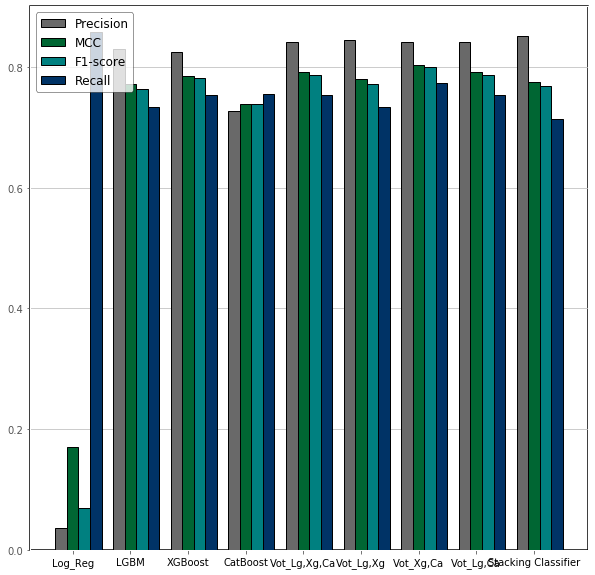

In [66]:
from scipy import interp
import matplotlib.pyplot as plt

X = df.drop(['Class'] ,axis=1)
y = df['Class']
#colors=['#696969','#2E8B57','#DC143C', '#008080']
colors=['#696969','#006633','#008080','#003366' ]
f, ax = plt.subplots(ncols=1,nrows=1, figsize=(10,10))
i=0
j=0 
x = np.arange(len(models)) 
xlim=[-0.05, 1.05]
ylim=[0.5, 1.05]
for model in models:
  cv = StratifiedKFold(n_splits=5)
  precision = []
  recall = []
  f1 = []
  MCC = []

  for train, test in cv.split(X, y):

      pred = model.fit(X.iloc[train], y.iloc[train]).predict(X.iloc[test])
      precision.append(precision_score(y.iloc[test], pred))
      recall.append(recall_score(y.iloc[test], pred)) 
      f1.append(f1_score(y.iloc[test], pred)) 
      MCC.append(matthews_corrcoef(y.iloc[test], pred)) 
      i+=1
  mean_precision = np.mean(precision) 
  mean_MCC = np.mean(MCC)
  mean_F1  = np.mean(f1)
  mean_recall = np.mean(recall)

  ax.bar(j-0.2, mean_precision,0.2, color=colors[0],  label='Precision',edgecolor="black", linewidth=1)
  ax.bar(j-0.2+0.2, mean_MCC,0.2, color=colors[1], label='MCC',edgecolor="black", linewidth=1)
  ax.bar(j-0.2+0.4, mean_F1,0.2, color=colors[2], label='F1',edgecolor="black", linewidth=1) 
  ax.bar(j-0.2+0.6,mean_recall ,0.2, color=colors[3], label ='Recall',edgecolor="black", linewidth=1)
  
  plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8],["Log_Reg","LGBM", "XGBoost", "CatBoost",
                                               "Vot_Lg,Xg,Ca", "Vot_Lg,Xg",
                                               "Vot_Xg,Ca", "Vot_Lg,Ca", "Stacking Classifier"], fontsize = 10, color = 'black')                                             
  ax.legend(['Precision', 'MCC', 'F1-score' , 'Recall'], loc='upper left',prop={'size': 12}, facecolor='white', edgecolor='black')
  ax.patch.set_facecolor('white')
  ax.yaxis.grid(True, color = '#C0C0C0')
  ax.patch.set_edgecolor('black')  
  ax.patch.set_linewidth('1.5')
  i=0
  j=j+1
 
plt.show()

In [67]:
models =[log_reg, lightgbm, xgboost, catboost, voting1, voting2, voting3, voting4, clf]
names = ["Log_Reg","LGBM", "XGB", "CatBoost",
        "Vot_Lg,Xg,Ca", "Vot_Lg,Xg",
        "Vot_Xg,Ca", "Vot_Lg,Ca", "Stacking"] 

In [68]:
colors = ['#ff1493','#8A2BE2', '#FFFF00', '#7FFFD4', '#8A2BE2','#800000', '#008B8B', '#FFFF00', '#FF0000']

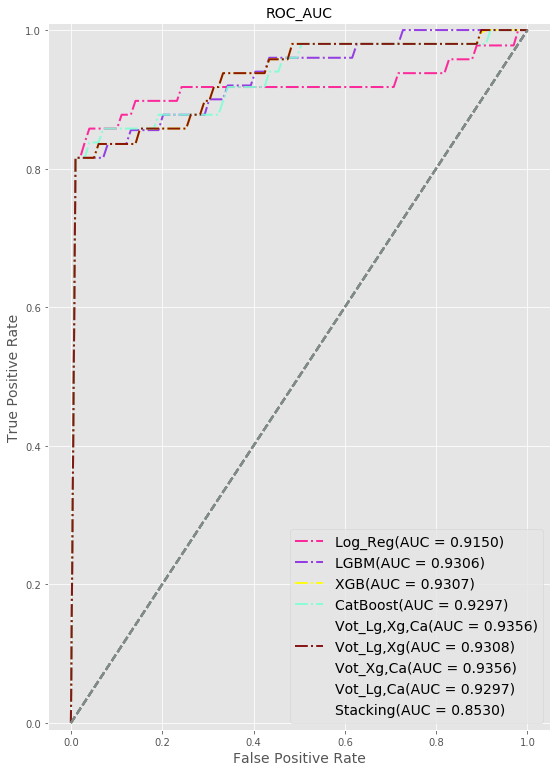

In [69]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
X = df.drop(['Class'] ,axis=1)
y = df['Class']
f, axes = plt.subplots(ncols=1,nrows=1, figsize=(9,13))
linestyle=['-.','-.','-.','-.','','-.','','','']
i=0
j=0
for model in models:
  cv = StratifiedKFold(n_splits=5)
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  for train, test in cv.split(X, y):

      probas_ = model.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
      fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:,1])
      tprs.append(interp(mean_fpr, fpr, tpr))
      tprs[-1][0] = 0.0
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      i+=1
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  axes.plot([0, 1], [0, 1], linestyle='--', lw=2, color='#808A87', alpha=.9)
  axes.plot(mean_fpr, mean_tpr, color=colors[j],
            label= r'%s(AUC = %0.4f)'% (names[j], mean_auc),
            linestyle=linestyle[j], lw=2, alpha=0.9)
  xlim=[-0.05, 1.05]
  ylim=[-0.05, 1.05] 
  axes.legend(loc="lower right", prop={'size': 14})  
  i=0
  j=j+1
plt.xlabel('False Positive Rate',fontsize=14)
plt.title('ROC_AUC', fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14) 
plt.ylim([-0.01,1.01])  
plt.show()           

In [70]:
colors = ['#ff1493','#8A2BE2', '#00FF00','#F4A460', '#808000','#FFD700', '#800000', '#008B8B', '#FF0000']

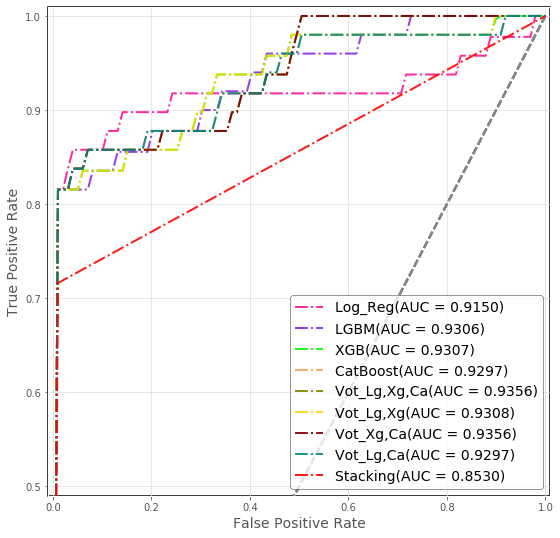

In [71]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
X = df.drop(['Class'] ,axis=1)
y = df['Class']
f, axes = plt.subplots(ncols=1,nrows=1, figsize=(9,9))

i=0
j=0
for model in models:
  cv = StratifiedKFold(n_splits=5)
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  for train, test in cv.split(X, y):

      probas_ = model.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
      fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:,1])
      tprs.append(interp(mean_fpr, fpr, tpr))
      tprs[-1][0] = 0.0
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      i+=1
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  axes.plot([0, 1], [0, 1], linestyle='--', lw=2, color='#808A87', alpha=.9)
  axes.plot(mean_fpr, mean_tpr, color=colors[j],
            label= r'%s(AUC = %0.4f)'% (names[j], mean_auc),
            linestyle='-.', lw=2, alpha=0.9)
  xlim=[-0.05, 1.05]
  ylim=[-0.05, 1.05]
  axes.patch.set_facecolor('white')
  axes.grid(True, color = '#E0E0E0')
  axes.patch.set_edgecolor('black')  
  axes.patch.set_linewidth('1.5') 
  axes.legend(loc="lower right", prop={'size': 14}, facecolor = 'white', edgecolor='black')  
  i=0
  j=j+1
plt.xlabel('False Positive Rate',fontsize=14)
#plt.title('ROC_AUC', fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.xlim([-0.01,1.01])
plt.ylim([0.49,1.01])   
plt.show()

In [72]:
models =[log_reg, lightgbm, xgboost, catboost, voting1, voting2, voting3, voting4, clf]
names = ["Log_Reg","LGBM", "XGB", "CatBoost",
        "Vot_Lg,Xg,Ca", "Vot_Lg,Xg",
        "Vot_Xg,Ca", "Vot_Lg,Ca", "Stacking"] 

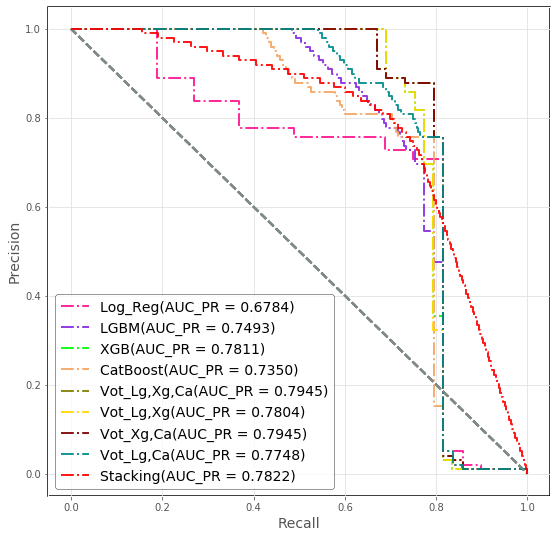

In [73]:
import matplotlib.pyplot as plt
import numpy
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve, auc
from scipy import interp
X = df.drop(['Class'] ,axis=1)
y = df['Class']
f, axes = plt.subplots(ncols=1,nrows=1, figsize=(9,9))
i=0
j=0
for model in models:
  cv = StratifiedKFold(n_splits=5)
    # defining the lists
  prs = []
  aucs = []
  mean_recall = np.linspace(0, 1, 100)
  for train, test in cv.split(X, y):

      probas_ = model.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
      # Compute PR curve and area the curve
      precision, recall, thresholds = precision_recall_curve(y[test], probas_[:, 1])
      prs.append(interp(mean_recall, precision, recall))
      pr_auc = auc(recall, precision)
      aucs.append(pr_auc)
      i+=1
  axes.plot([0, 1], [1, 0], linestyle='--', lw=2, color='#808A87', alpha=.9)
  mean_precision = np.mean(prs, axis=0)
  mean_auc = auc(mean_recall, mean_precision)
  axes.step(mean_precision, mean_recall,
             label=r'%s(AUC_PR = %0.4f)' % (names[j], mean_auc),
             linestyle='-.',lw=2, alpha=0.9 , color=colors[j])
             
  xlim=[-0.05, 1.05]
  ylim=[-0.05, 1.05]  
  axes.patch.set_facecolor('white')
  axes.grid(True, color = '#E0E0E0')
  axes.patch.set_edgecolor('black')  
  axes.patch.set_linewidth('1.5') 
  axes.legend(loc="lower left", prop={'size': 14}, facecolor = 'white', edgecolor='black')
  i=0
  j=j+1
#plt.title('AUC_Precision Recall Curve', fontsize=14)
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
 
plt.show()

# ***DeepLearning***

# ***x,y train, test data***

In [74]:
train1, test1 = train_test_split(data, test_size = 0.2, random_state=42)
print("Train1 Shape: {} \nTest1 Shape: {}".format(train1.shape, test1.shape))

Train1 Shape: (22771, 32) 
Test1 Shape: (5693, 32)


###x,y train

In [75]:
X_train1  = train1.drop('Class', axis=1).values
y_train1  = train1['Class'].values
print('\nX_train1  shape: {} \ny_train1 shape: {}'.format(X_train1.shape, y_train1.shape))


X_train1  shape: (22771, 31) 
y_train1 shape: (22771,)


In [76]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train1  = robust_scaler.fit_transform(X_train1)

###X, y test

In [77]:
X_test1  = test1.drop('Class', axis=1).values
y_test1  = test1['Class']
print('\nX_test1  shape: {} \ny_test1 shape: {}'.format(X_test1.shape, y_test1.shape))


X_test1  shape: (5693, 31) 
y_test1 shape: (5693,)


In [78]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

X_test1 = rob_scaler.fit_transform(X_test1)

#***genarate model***

In [79]:
def generate_model(batch_size, epochs, neuronPct):
   
    model = Sequential()
    neurons = int(neuronPct * 100)
    # So long as there would have been at least 20 neurons and fewer than 5layers, create a new layer. 
    layer = 0
    while  round(neurons)>20 and layer <5:
        # The first (0th) layer needs an input input_dim(neuronCount)
        if layer==0:  
           model.add(Dense(neurons,input_dim=31 , activation= 'relu', kernel_initializer='he_uniform'))
        else:
            model.add(Dense(neurons, activation='relu'))                

        layer += 1
        neurons = round((neurons +1)/2)

    model.add(Dense(1,activation='sigmoid')) # Output
    return model

In [80]:
def keras_cv(batch_size, epochs, neuronPct):
    cv = StratifiedKFold(n_splits=5)
    num = 0
    for train, test in cv.split(X_train1, y_train1):
        num+=1
        # Split train and test
        x_train = X_train1[train]
        Y_train = y_train1[train]
        x_test = X_train1[test]
        Y_test = y_train1[test]
        model = generate_model(batch_size, epochs, neuronPct)
        opt = tf.keras.optimizers.Adam() #optimizer
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss")
        params_dl['batch_size'] = round(batch_size)
        params_dl['epochs'] = round(epochs)
        params_dl['neuronPct'] = neuronPct
        model.fit(x_train,Y_train,validation_split=0.1
                  ,class_weight={0:0.25, 1:148}
                  ,callbacks=[callback]
                  ,verbose=0,epochs=round(epochs), batch_size=round(batch_size))

        # Predict on the out of boot (validation)
        proba = model.predict(x_test)
        pred = (model.predict(x_test)> 0.5)
        score = metrics.log_loss(Y_test, pred)
    tensorflow.keras.backend.clear_session()
    return (-(np.mean(score)))

params_dl={'batch_size' : (1000,3500),
           'epochs' : (25,150),
           'neuronPct': (0.51, 1)
           }   

dlBO = BayesianOptimization(keras_cv, params_dl, verbose=2)
# verbose = 1 prints only when a maximum 
# is observed, verbose = 0 is silent
start = time.time()
dlBO.maximize(init_points=6, n_iter =10, acq='ei')

print('It takes %s minutes' % ((time.time() - start)/60))

params_dl = dlBO.max['params']
params_dl['epochs'] = round(params_dl['epochs'])
params_dl['batch_size'] = round(params_dl['batch_size'])
params_dl['neuronPct'] = round((params_dl['neuronPct']), 2)
print(params_dl)

|   iter    |  target   | batch_... |  epochs   | neuronPct |
-------------------------------------------------------------
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
|  1        | -15.62    |  2.919e+0 |  104.6    |  0.8362   |
|  2        | -11.6     |  1.306e+0 |  117.8    |  0.6025   |
|  3        | -4.126    |  1.793e+0 |  126.1    |  0.78     |
|  4        | -11.37    |  3.087e+0 |  78.3     |  0.7587   |
|  5        | -16.22    |  2.614e+0 |  75.47    |  0.8467   |
|  6        | -20.4     |  2.835e+0 |  75.3     |  0.704    |
|  7        | -1.805    |  1.793e+0 |  123.5    |  0.6536   |
|  8        | -0.9936   |  1.793e+0 |  119.3    |  0.51     |
|  9        | -2.131    |  1.784e+0 |  118.8    |  0.9948   |
|  10       | -13.98    |  1.806e+0 |  114.0    |  0.7703   |
|  11       | -6.128    |  1.789e+0 |  121.8    |  0.6506   |
|  12       | -3.747    |  1.783e+0 |  113.9    |  0.801

#***model summury***

In [81]:
model = generate_model(batch_size= 1563 ,epochs=117 ,neuronPct=0.86)

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 86)                2752      
_________________________________________________________________
dense_1 (Dense)              (None, 44)                3828      
_________________________________________________________________
dense_2 (Dense)              (None, 22)                990       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 23        
Total params: 7,593
Trainable params: 7,593
Non-trainable params: 0
_________________________________________________________________


#***result keras***

In [83]:
opt = tf.keras.optimizers.Adam() #optimizer

model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history = model.fit(X_train1, y_train1, epochs =117 ,
                    batch_size=1563,validation_split = 0.1
                    ,class_weight={0:0.25, 1:148}  
                    ,verbose = 0)
history_dict = history.history     
y_prob = model.predict(X_test1)    
y_pred = (model.predict(X_test1)> 0.5).astype("int32")

In [84]:
print(classification_report(y_test1 , y_pred))
print(confusion_matrix(y_test1 , y_pred))

# summary  
print('\n')
print('--------- Summary ------------')
print('\n')
print('accuracy: {}'.format(round(accuracy_score(y_test1, y_pred),4)))
print('Precision: {}'.format(round(precision_score(y_test1, y_pred),4)))
print('f1: {}'.format(round(metrics.f1_score(y_test1, y_pred),4)))
print('Recall: {}'.format(round(recall_score(y_test1, y_pred),4)))
print('AUC: {}'.format(round(roc_auc_score(y_test1, y_prob),4)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test1, y_prob),4)))
print('MCC: {}'.format((matthews_corrcoef(y_test1, y_pred))))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5683
           1       0.50      0.50      0.50        10

    accuracy                           1.00      5693
   macro avg       0.75      0.75      0.75      5693
weighted avg       1.00      1.00      1.00      5693

[[5678    5]
 [   5    5]]


--------- Summary ------------


accuracy: 0.9982
Precision: 0.5
f1: 0.5
Recall: 0.5
AUC: 0.6169
Precision-Recall: 0.5011
MCC: 0.4991201830019356


#***diagram loss , accuracy train***

Text(0.5, 1.0, 'val_loss')

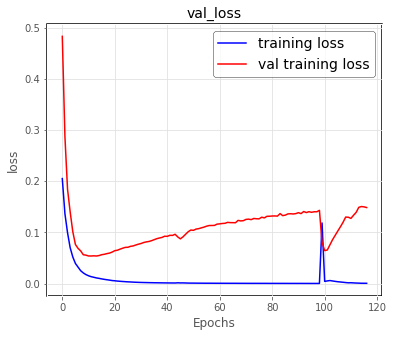

In [85]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
f, ax = plt.subplots(ncols=1,nrows=1, figsize=(6,5))
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
ax.patch.set_facecolor('white')
ax.grid(True, color = '#E0E0E0')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5') 
ax.legend(loc="upper right", prop={'size': 14}, facecolor = 'white', edgecolor='black')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title('val_loss', fontsize=14)

Text(0.5, 1.0, 'val_accuracy')

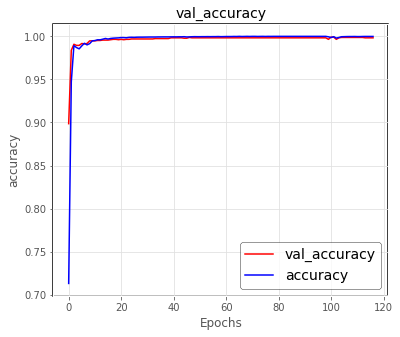

In [86]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
f, ax = plt.subplots(ncols=1,nrows=1, figsize=(6,5))
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
ax.patch.set_facecolor('white')
ax.grid(True, color = '#E0E0E0')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5') 
ax.legend(loc="lower right", prop={'size': 14}, facecolor = 'white', edgecolor='black')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title('val_accuracy', fontsize=14)

#***diagram roc_auc***

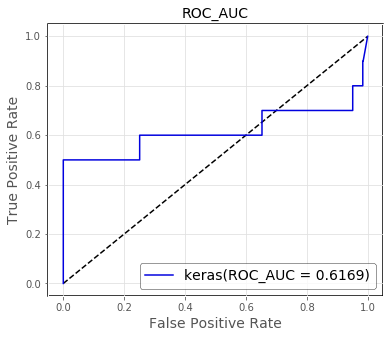

In [87]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test1, y_prob,pos_label=True)
from sklearn.metrics import auc
f, ax = plt.subplots(ncols=1,nrows=1, figsize=(6,5))
auc = auc(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr,color = "#0101DF", label='keras(ROC_AUC = {:.4f})'.format(auc))
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC', fontsize=14) 
ax.patch.set_facecolor('white')
ax.grid(True, color = '#E0E0E0')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5') 
ax.legend(loc="lower right", prop={'size': 14}, facecolor = 'white', edgecolor='black')
plt.show()

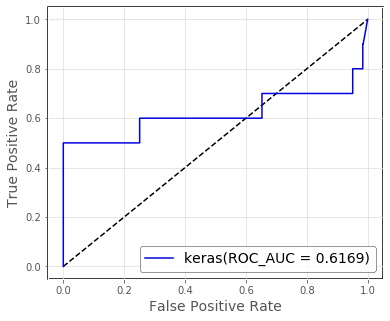

In [88]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test1, y_prob,pos_label=True)
from sklearn.metrics import auc
f, ax = plt.subplots(ncols=1,nrows=1, figsize=(6,5))
auc = auc(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr,color = "#0101DF", label='keras(ROC_AUC = {:.4f})'.format(auc))
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
#plt.title('ROC_AUC', fontsize=14) 
ax.patch.set_facecolor('white')
ax.grid(True, color = '#E0E0E0')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5') 
ax.legend(loc="lower right", prop={'size': 14}, facecolor = 'white', edgecolor='black')
plt.show()

#***diagram precision recall***

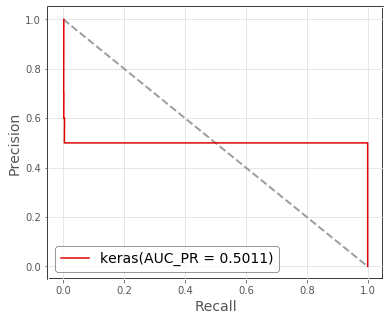

In [89]:
from sklearn.metrics import precision_recall_curve
precision,recall, _ = precision_recall_curve(y_test1, y_prob)
f, ax = plt.subplots(ncols=1,nrows=1, figsize=(6,5))
plt.plot([0, 1], [1, 0], linestyle='--', lw=2, color='#808A87', alpha=.8)
plt.plot(precision,recall,  color="#DF0101", label='keras(AUC_PR = {:.4f})'.format(round(average_precision_score(y_test1, y_prob),4)))
#plt.plot(precision,recall,  color="#DF0101", label='keras(AUC_PR)')
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
#plt.title('Precision-Recall curve',fontsize=14) 
ax.patch.set_facecolor('white')
ax.grid(True, color = '#E0E0E0')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1.5') 
ax.legend(loc="lower left", prop={'size': 14}, facecolor = 'white', edgecolor='black')
plt.show()

# Accuracy Comparison

In [90]:
log_reg = model_accuracy[0]
lightgbm = model_accuracy[1]
xgboost = model_accuracy[2]
catboost = model_accuracy[3]
voting1 = model_accuracy[4]
voting2 = model_accuracy[5]
voting3 = model_accuracy[6]
voting4 = model_accuracy[7]
stack = model_accuracy[8]

In [91]:
nn = accuracy_values[10]

In [92]:
score = [log_reg,lightgbm,xgboost,catboost,voting1,voting2,voting3,voting4,stack,nn]

In [93]:
#make variabel for save the result and to show it
classifier = ('Logistic Regression','LightGBM','XGBoost','CATBoost','LG+XG+CA','LG+XG','XG+CA','LG+CA','Stacking Classifier','Neural Network')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7 8 9]
[0.9969084594153983, 0.9991216914066035, 0.9992622272003974, 0.9969084594153983, 0.9991216914066035, 0.9992622272003974, 0.9992270963379347, 0.9993324827533512, 0.999086572888084, 0.9950714707374573]


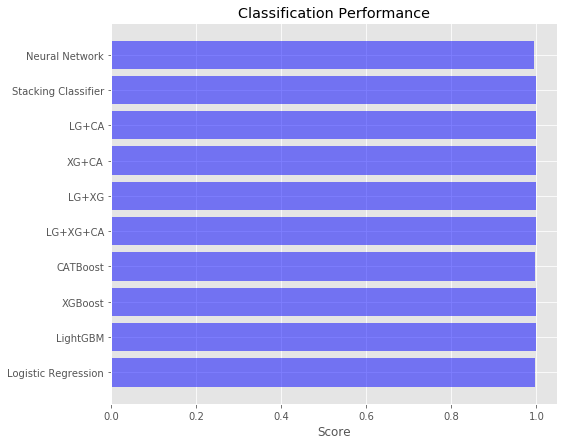

In [94]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [9]:
import numpy as np
import pandas as pd

data = pd.read_csv('processed.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28464 entries, 0 to 28463
Data columns (total 8 columns):
Unnamed: 0    28464 non-null int64
V10           28464 non-null float64
V11           28464 non-null float64
V12           28464 non-null float64
V14           28464 non-null float64
V16           28464 non-null float64
V17           28464 non-null float64
Class         28464 non-null int64
dtypes: float64(6), int64(2)
memory usage: 1.7 MB


In [11]:
del data['Unnamed: 0']

In [12]:
X = data.iloc[:, 0:6]
y = data.iloc[:,6]

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=1)

In [14]:
#Extension
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=1000, random_state=4000)),('lgbm', LGBMClassifier(learning_rate='0.182', max_depth= '8', num_leaves= '33', class_weight='balanced'))]

clf = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=200))


In [15]:
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [16]:
print("*Classification Matrix for RF: ")
print(classification_report(y_test, predictions))

*Classification Matrix for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8525
           1       0.92      0.80      0.86        15

    accuracy                           1.00      8540
   macro avg       0.96      0.90      0.93      8540
weighted avg       1.00      1.00      1.00      8540



In [17]:
import joblib
filename = 'model_.sav'
joblib.dump(clf, filename)

['model_.sav']